In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

<h3 style='color:purple'>Data analysis and preprocessing</h3>

In [2]:
df = pd.read_csv('Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [3]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [4]:
df.shape

(10000, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [6]:
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [7]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [8]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

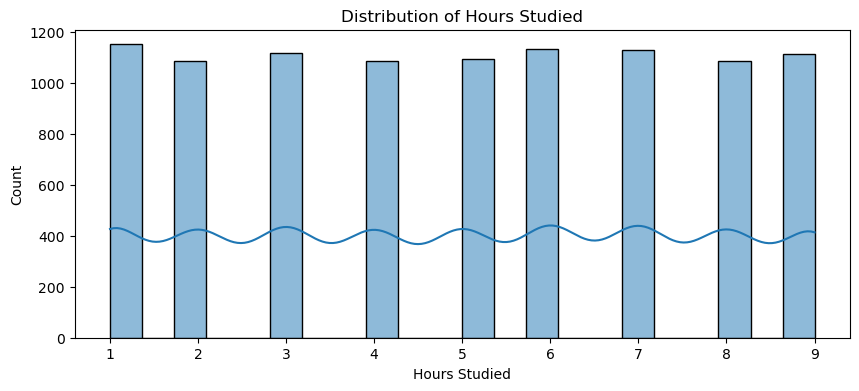

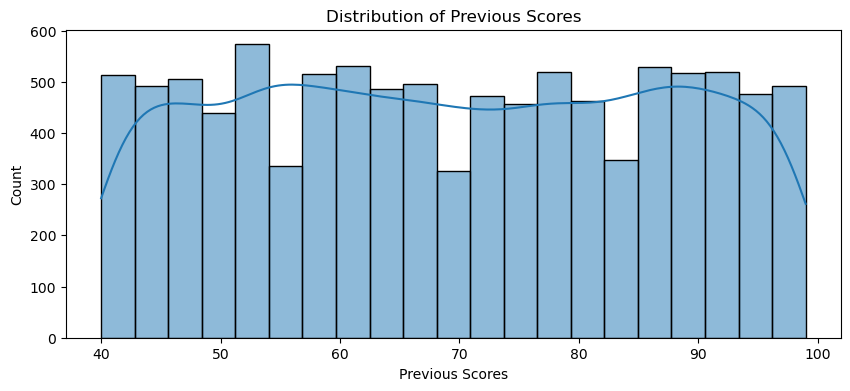

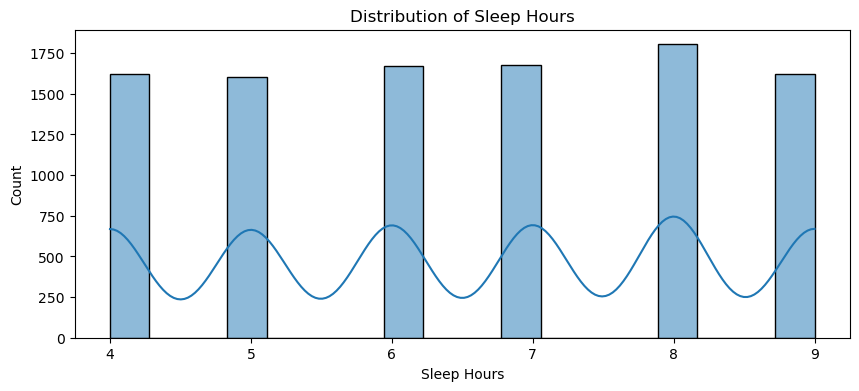

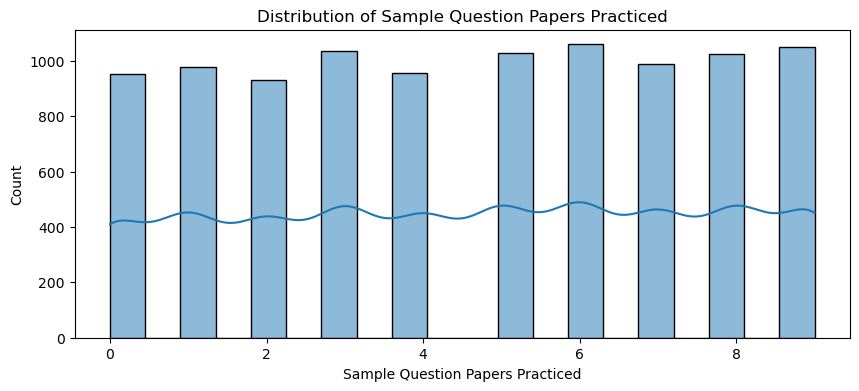

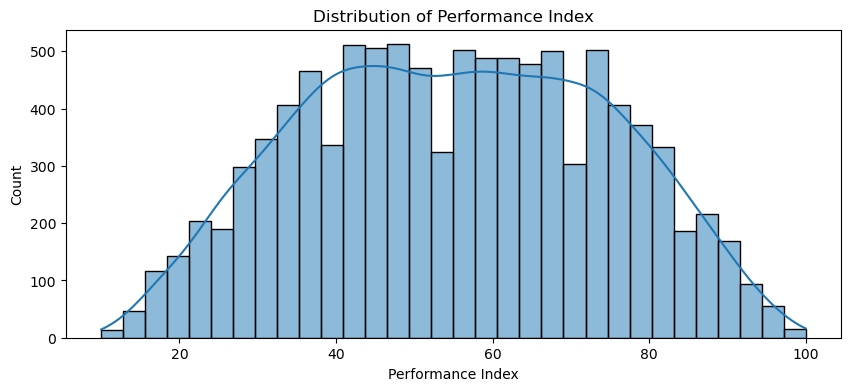

In [9]:
# Distribution of numerical features
numerical_features = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']

for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

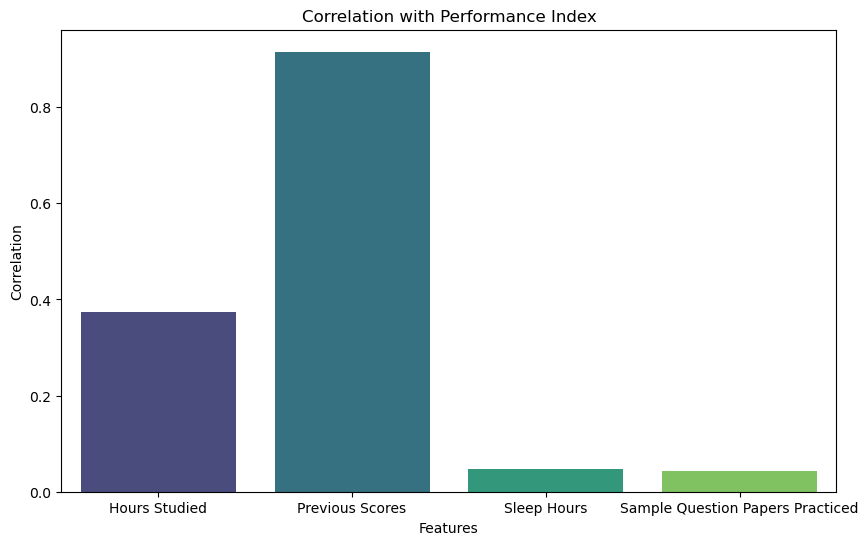

In [11]:
correlations = df[numerical_features].corr()['Performance Index'].drop('Performance Index')
# Plot the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.index, y=correlations.values, palette='viridis')
plt.title('Correlation with Performance Index')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()

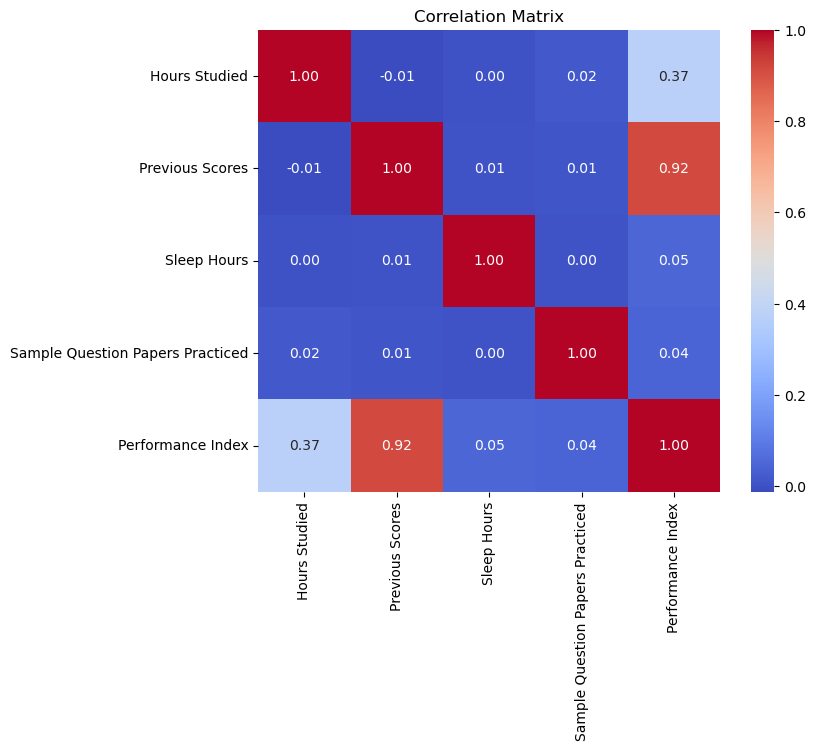

In [12]:
# Calculate the correlation matrix
correlation_matrix = df[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

C:\Users\THINKUP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


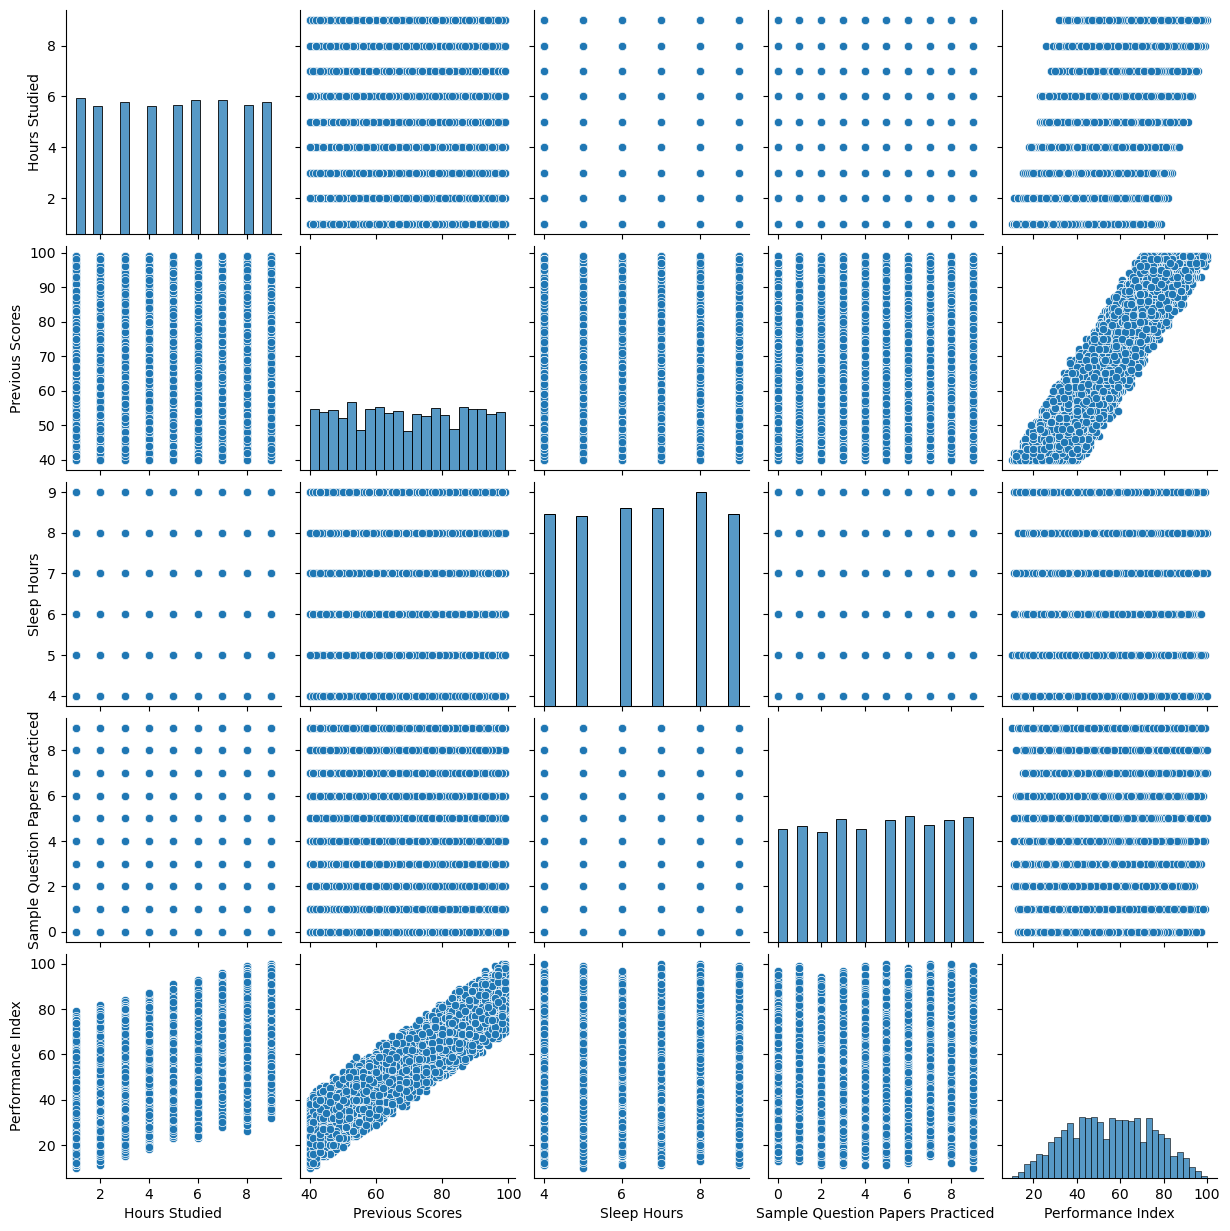

In [14]:
sns.pairplot(df[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']])
plt.show()

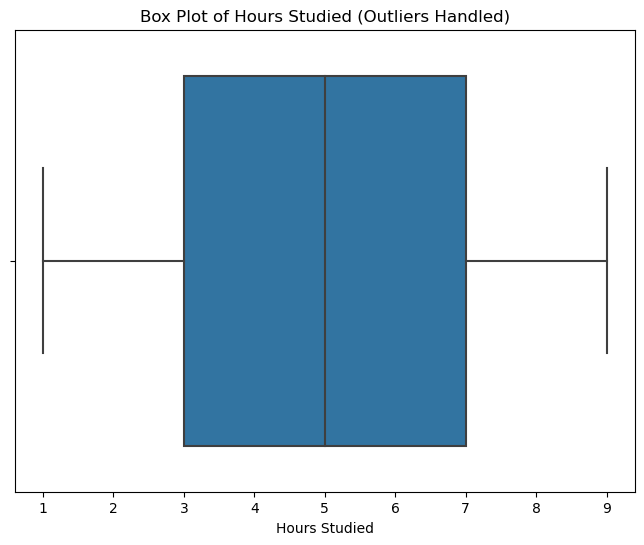

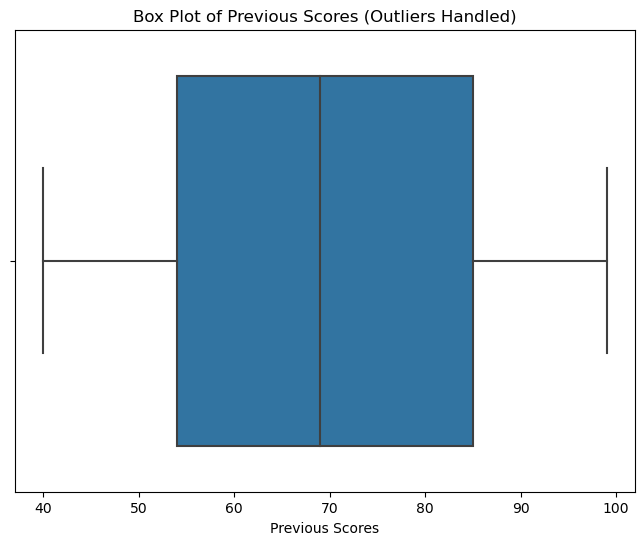

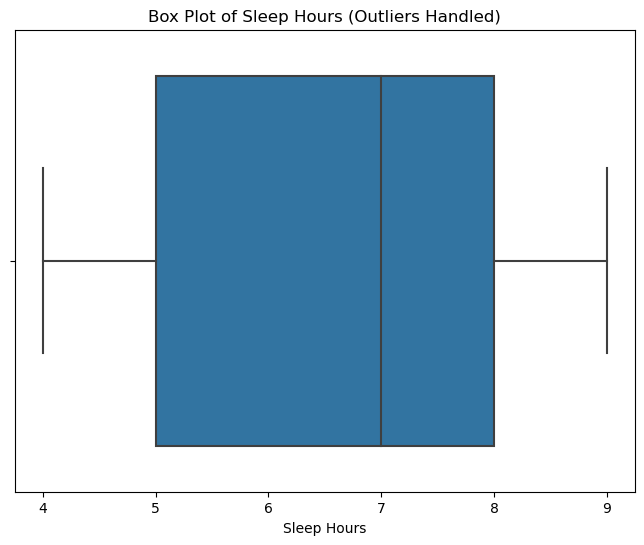

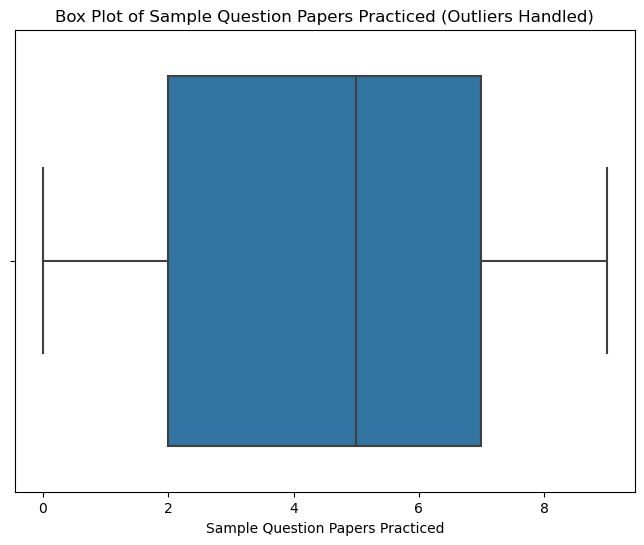

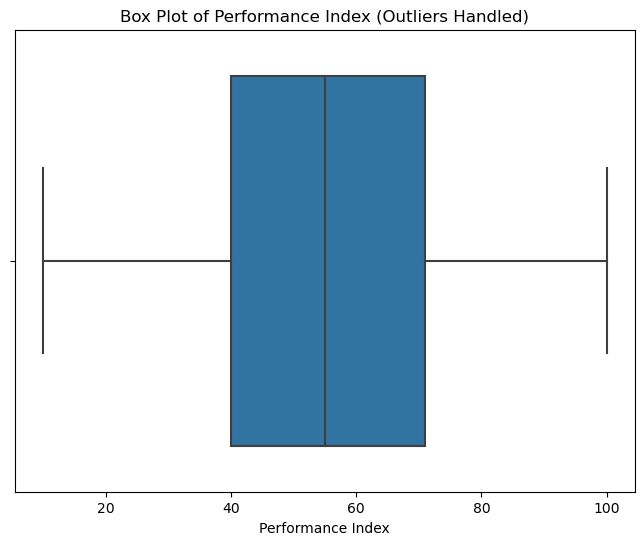

In [15]:
features = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=feature, data=df)
    plt.title(f'Box Plot of {feature} (Outliers Handled)')
    plt.xlabel(feature)
    plt.show()

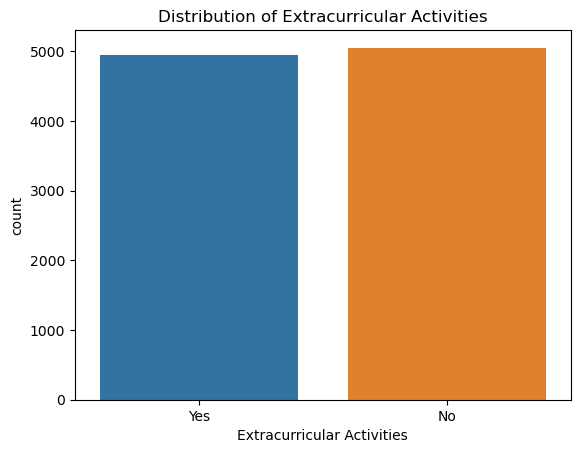

In [16]:
# Distribution of the target variable
sns.countplot(data=df, x='Extracurricular Activities')
plt.title('Distribution of Extracurricular Activities')
plt.show()

<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

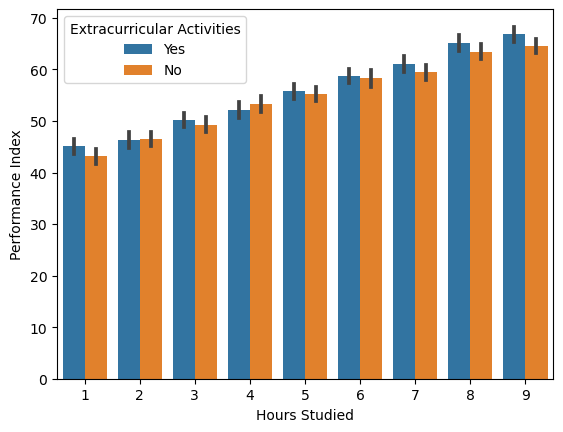

In [17]:
#Visualization\
sns.barplot(x='Hours Studied', y='Performance Index', hue='Extracurricular Activities', data=df)

<h2 style='color:purple'>Feature engineering and data modeling</h2>

In [21]:
df.replace({'No': 0, 'Yes': 1}, inplace=True)

In [25]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int64  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


In [27]:
X = df.drop('Performance Index', axis='columns')
X.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5


In [29]:
y = df['Performance Index']
y.head()

0    91.0
1    65.0
2    45.0
3    36.0
4    66.0
Name: Performance Index, dtype: float64

In [60]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X,y)

LinearRegression()

In [61]:
reg.coef_

array([2.85298205, 1.01843419, 0.61289758, 0.48055975, 0.19380214])

In [62]:
reg.intercept_

-34.0755880919136

In [63]:
reg.predict([[6, 90, 1, 8, 2]])

C:\Users\THINKUP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([79.54636144])

In [65]:
2.85298205*6 + 1.01843419*90 + 0.61289758*1 + 0.48055975*8 + 0.19380214*2 + -34.0755880919136

79.5463611680864

In [66]:
reg.predict([[3, 70, 0, 6, 2]])

C:\Users\THINKUP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([49.04471434])

In [67]:
2.85298205*3 + 1.01843419*70 + 0.61289758*0 + 0.48055975*6 + 0.19380214*2 + -34.0755880919136

49.044714138086405

**Saving the model**

In [68]:
from joblib import dump, load

In [69]:
dump(reg,'model_joblib')

['model_joblib']

In [70]:
mj = load('model_joblib')

In [88]:
mj.predict([[4, 85, 1, 8, 4]])

C:\Users\THINKUP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([69.13583065])